In [1]:
%load_ext autoreload
%autoreload 2

Try to make the plots independent.

## result-MCMC-lc0

In [3]:
import matplotlib.pyplot as plt
plt.style.use('./nice.mplstyle')
import numpy as np
import pandas as pd
import sys
sys.path.append('../tools')
import clusterfit as cf

# Lightcone number
i = 0

# Calculate and plot the bulk flow for the first lightcone
data = pd.read_csv(f'../data/samples_in_lightcone{i}_with_trees_duplicate_excision.csv')
true_zmaxs, true_ubfs, true_vlons, true_vlats = cf.true_bulk_flow_z(data, 'cluster_average') # ubf_z returns a list
true_zmaxs = np.array(true_zmaxs)

z<0.03, 29 haloes 182.70 km/s (119.77, 37.48)
z<0.04, 61 haloes 169.70 km/s (117.12, 54.32)
z<0.05, 88 haloes 100.65 km/s (126.98, 48.82)
z<0.06, 138 haloes 98.35 km/s (89.29, 48.44)
z<0.07, 161 haloes 94.94 km/s (84.13, 44.28)
z<0.08, 184 haloes 96.62 km/s (90.86, 50.10)
z<0.09, 214 haloes 100.80 km/s (82.78, 44.45)
z<0.10, 227 haloes 96.98 km/s (83.33, 44.97)
z<0.11, 248 haloes 98.47 km/s (73.46, 48.18)
z<0.12, 267 haloes 87.73 km/s (69.85, 42.42)
z<0.13, 282 haloes 77.84 km/s (65.00, 43.43)
z<0.14, 294 haloes 72.61 km/s (60.40, 41.67)
z<0.15, 300 haloes 67.54 km/s (61.46, 41.82)


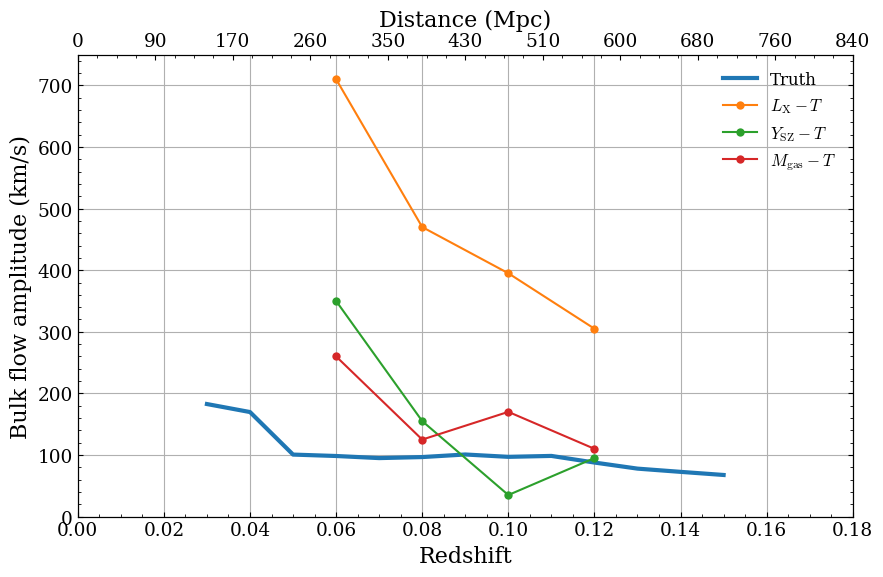

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(true_zmaxs, true_ubfs, linewidth=3, label='Truth')

# Plot the modeled bulk flow
df = pd.read_csv(f'../data/fits/bulk_flow_lightcone{i}.csv')
df_bootstrap = pd.read_csv(f'../data/fits/bulk_flow_bootstrap_lightcone{i}.csv')
for relation, label in zip(['LX-T', 'YSZ-T', 'M-T'], ['$L_\\mathrm{{X}}-T$', '$Y_\\mathrm{{SZ}}-T$', '$M_\\mathrm{{gas}}-T$']):
    zmax = df['zmax'].loc[df['scaling_relation']==relation] # Do LX-T for now
    ubfs = df['ubf'].loc[df['scaling_relation']==relation]
    zmaxs = np.array(zmax)
    ax.plot(zmaxs, ubfs, marker='o', label=f'{label}')

# Set up the plot
ax.set_xlabel('Redshift')
ax.set_ylabel('Bulk flow amplitude (km/s)')
ax.set_xticks(np.linspace(0, 0.2, 11))

# set a double x label for redshift
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=68.1, Om0=0.306) # To convert between redshift and distance
ax2 = ax.twiny()
ax2.set_xlim(0, 0.2)
ax2.set_xticks(np.linspace(0, 0.2, 11))                    # this line maps the x values to the new x axis
Dco = cosmo.comoving_distance(np.linspace(0,0.2,11)).value # this line sets the tick labels for the new x axis
xtickslabels = np.round(Dco, -1)
xtickslabels = np.array(xtickslabels, dtype=int) 
ax2.set_xticklabels(xtickslabels) # this line sets the tick labels for the new x axis
ax2.set_xlabel('Distance (Mpc)')

ax.grid(True)
ax.set_xlim(0, 0.18)
ax.set_ylim(0, 750)

# legend on the bottom ouside of the plot
ax.legend(loc='upper right', shadow=True)
plt.show()

z<0.03, 37 haloes 244.55 km/s (198.25, 19.06)
z<0.04, 53 haloes 197.68 km/s (203.90, 32.23)
z<0.05, 87 haloes 204.47 km/s (210.50, 12.95)
z<0.06, 114 haloes 184.63 km/s (210.24, 6.93)
z<0.07, 151 haloes 173.48 km/s (204.13, 1.84)


z<0.08, 183 haloes 149.16 km/s (201.26, -5.66)
z<0.09, 212 haloes 145.37 km/s (205.11, -8.60)
z<0.10, 237 haloes 133.43 km/s (208.23, -9.32)
z<0.11, 263 haloes 123.39 km/s (209.77, -10.94)
z<0.12, 277 haloes 117.37 km/s (210.22, -6.92)
z<0.13, 291 haloes 116.57 km/s (208.67, -5.27)
z<0.14, 298 haloes 114.53 km/s (211.09, -4.00)
z<0.15, 303 haloes 113.03 km/s (211.89, -1.99)


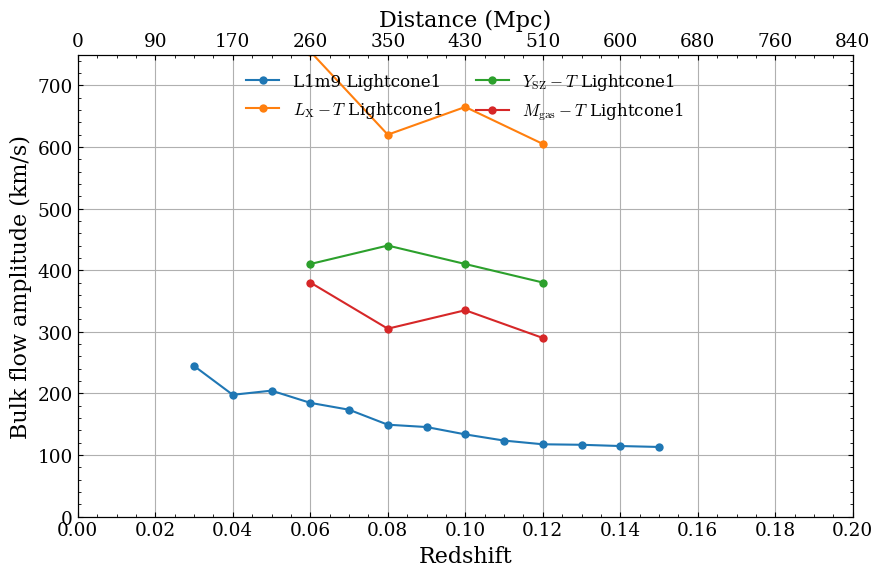

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=68.1, Om0=0.306)
fig, ax = plt.subplots(figsize=(10, 6))

# Lightcone number
i = 1

# Calculate and plot the bulk flow for the first lightcone
data = pd.read_csv(f'../data/samples_in_lightcone{i}_with_trees_duplicate_excision.csv')
zmaxs, ubfs, vlons, vlats = cf.true_bulk_flow_z(data) # ubf_z returns a list
zmaxs = np.array(zmaxs)

ax.plot(zmaxs, ubfs, marker='o', label=f'L1m9 Lightcone{i}')



# Plot the modeled bulk flow
df = pd.read_csv(f'../data/fits/bulk_flow_lightcone{i}.csv')
for relation, label in zip(['LX-T', 'YSZ-T', 'M-T'], ['$L_\\mathrm{{X}}-T$', '$Y_\\mathrm{{SZ}}-T$', '$M_\\mathrm{{gas}}-T$']):
    zmax = df['zmax'].loc[df['scaling_relation']==relation] # Do LX-T for now
    ubfs = df['ubf'].loc[df['scaling_relation']==relation]
    zmaxs = np.array(zmax)
    ax.plot(zmaxs, ubfs, marker='o', label=f'{label} Lightcone{i}')



# Set up the plot
ax.set_xlabel('Redshift')
ax.set_ylabel('Bulk flow amplitude (km/s)')
ax.set_xticks(np.linspace(0, 0.2, 11))

# set a double x label for redshift
ax2 = ax.twiny()
ax2.set_xlim(0, 0.2)
ax2.set_xticks(np.linspace(0, 0.2, 11))                    # this line maps the x values to the new x axis
Dco = cosmo.comoving_distance(np.linspace(0,0.2,11)).value # this line sets the tick labels for the new x axis
xtickslabels = np.round(Dco, -1)
xtickslabels = np.array(xtickslabels, dtype=int) 
ax2.set_xticklabels(xtickslabels) # this line sets the tick labels for the new x axis
ax2.set_xlabel('Distance (Mpc)')

ax.grid(True)
ax.set_xlim(0, 0.2)
ax.set_ylim(0, 750)

# legend on the bottom ouside of the plot
ax.legend(loc='upper center', shadow=True, ncol=2)
plt.show()

## Plot the directions with errorbar + MCMC results + H0 anisotropy

In [2]:
#independent
# Calculate true bulk flow as a function of z
import pandas as pd
import sys
sys.path.append('../tools/')
import clusterfit as cf
from mpl_toolkits.basemap import Basemap

# Lightcone number
i = 0

data = pd.read_csv(f'../data/samples_in_lightcone{i}_with_trees_duplicate_excision.csv')
true_zmaxs, true_ubfs, true_vlons, true_vlats = cf.true_bulk_flow_z(data, zrange0=0.06, zrange1=0.13, zstep=0.02) # ubf_z returns a list
inversed_vlons, inversed_vlats = cf.opposite_direction_arr(true_vlons, true_vlats)

z<0.06, 138 haloes 98.35 km/s (89.29, 48.44)
z<0.08, 184 haloes 96.62 km/s (90.86, 50.10)
z<0.10, 227 haloes 96.98 km/s (83.33, 44.97)
z<0.12, 267 haloes 87.73 km/s (69.85, 42.42)


[-123.33333333 -146.         -146.         -180.        ] [ -5. -10. -10. -20.]
[-123.33333333 -180.         -180.         -180.        ] [-30. -30. -30. -20.]
[-123.33333333 -123.33333333 -123.33333333 -123.33333333] [20. 20. 20. 20.]


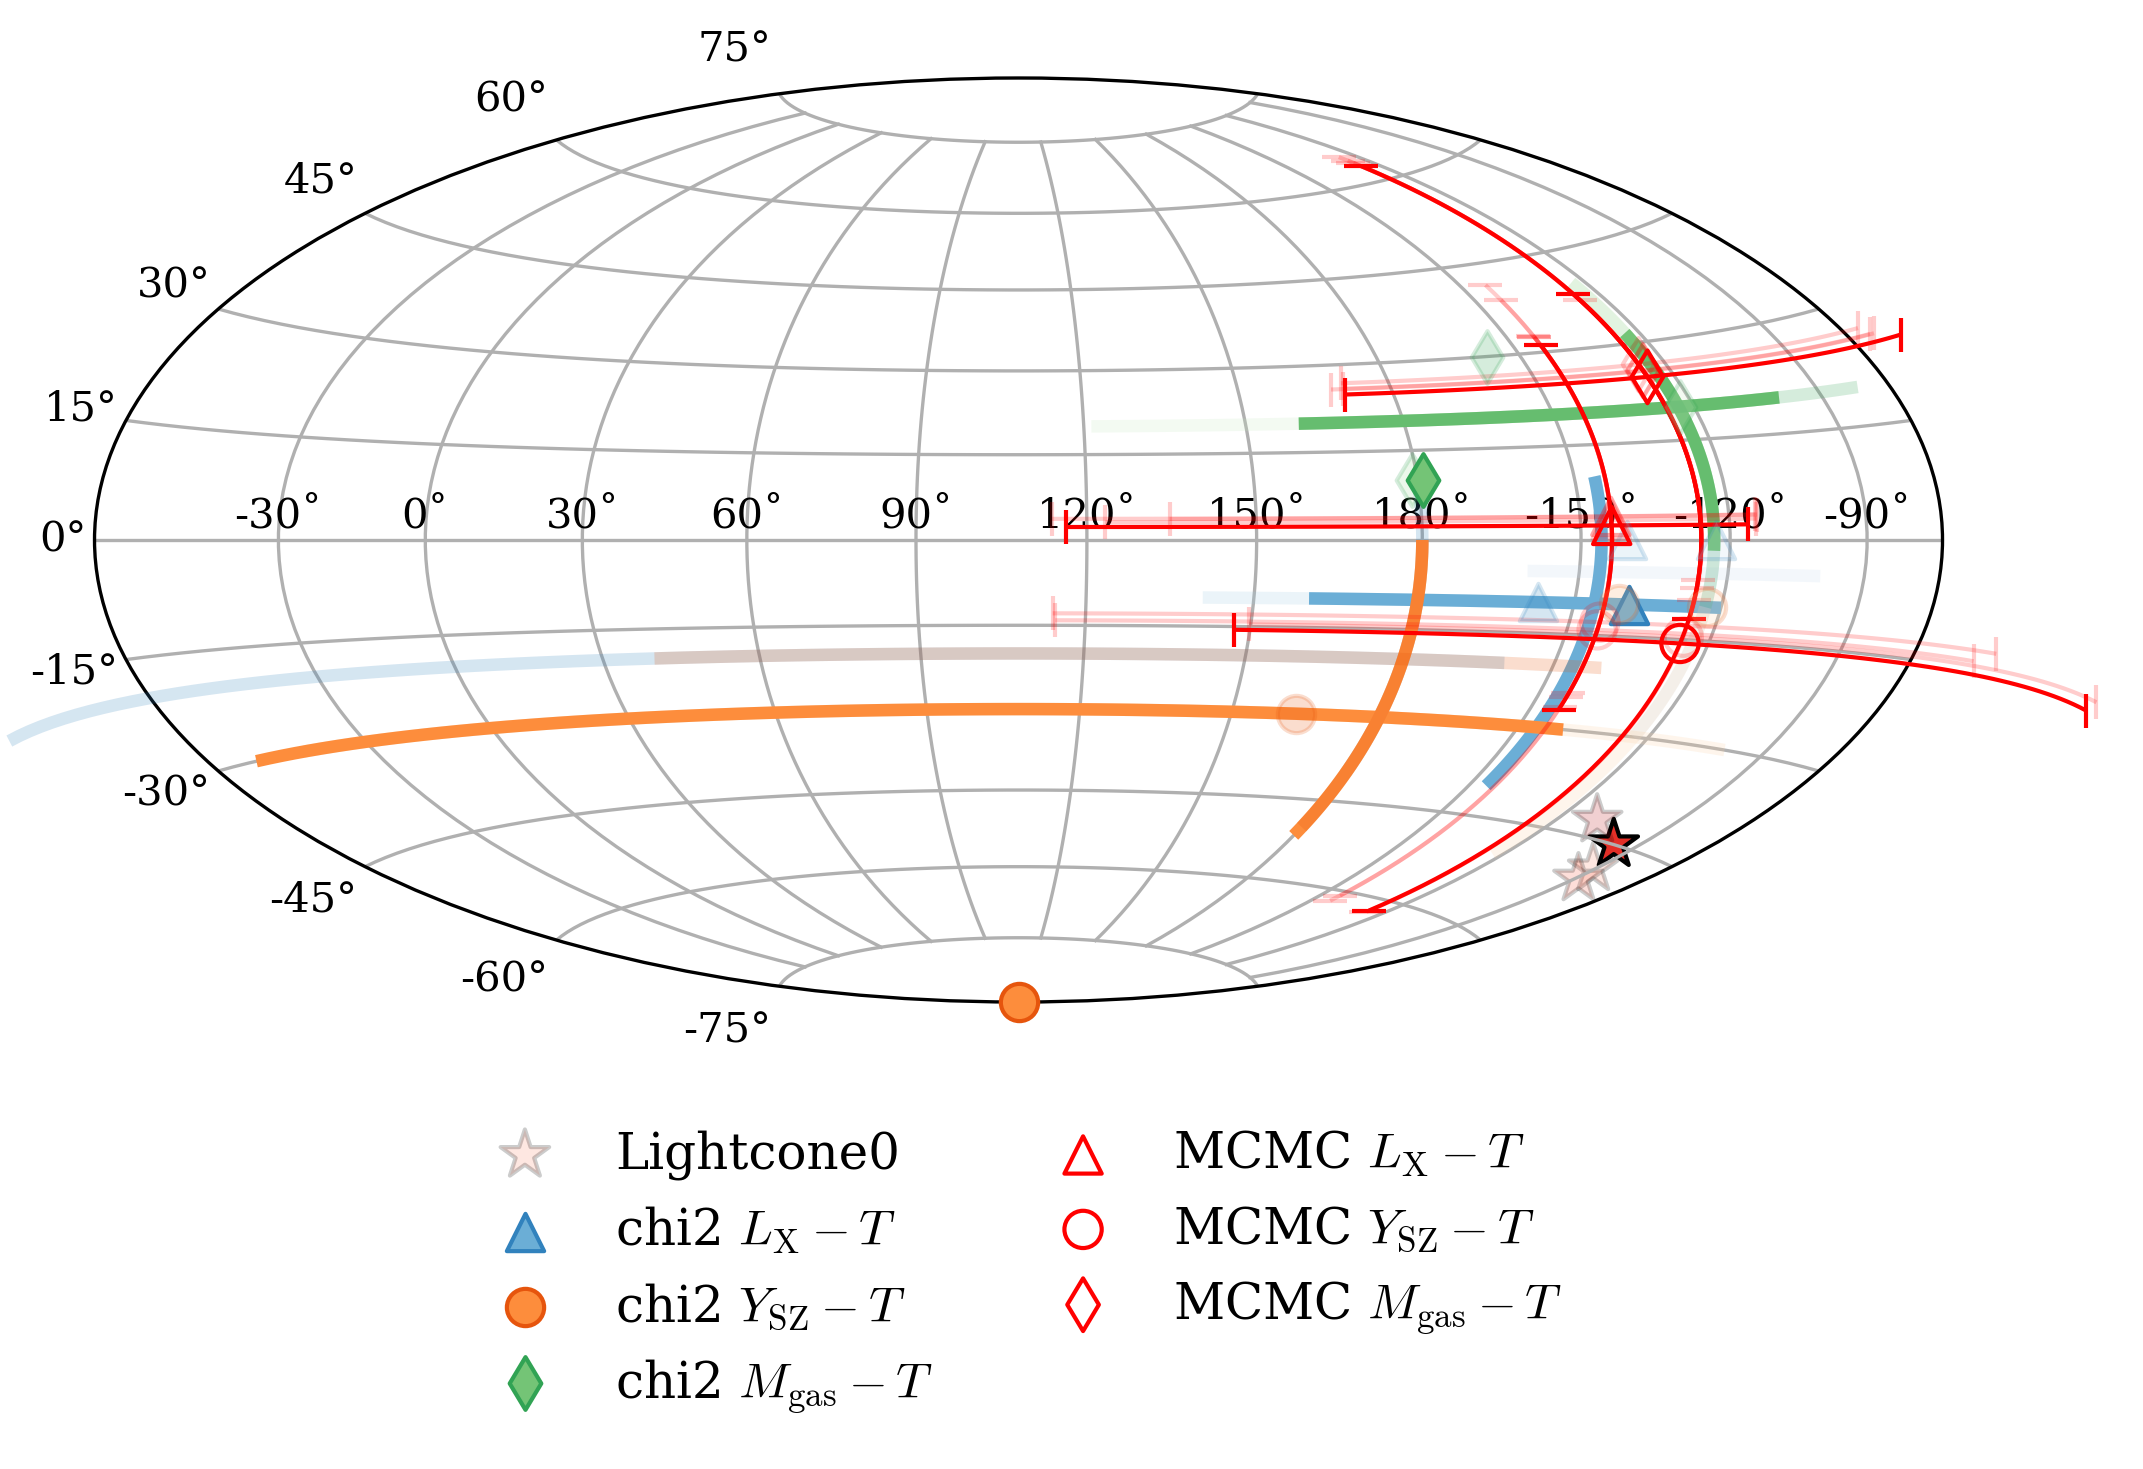

In [33]:
import matplotlib.pyplot as plt
plt.style.use('./nice.mplstyle')
import numpy as np
import pandas as pd 

#Use hammer projection
fig = plt.figure(figsize=(10, 4), dpi=300)
ax = fig.add_subplot(projection='hammer') # WARNING: matplotlib projection takes radian input instead of degree

# Basemap for imshow
# m = Basemap(projection='hammer', lon_0=0)

# Stress only one data to avoid making a messy graph
alphas = [0.2, 0.2, 1, 0.2]

# shift to avoid the lon error go outside of the range
shift = np.pi*1.4

# Calculate and plot the bulk flow for the first lightcone
ax.scatter(cf.lonshift(inversed_vlons*np.pi/180, shift) , 
           inversed_vlats*np.pi/180, 
           marker='*', c=true_zmaxs, 
           label=f'Lightcone{i}', 
            cmap='Reds', vmin=0, vmax=0.15, 
            s=150, edgecolors='black',
            alpha=alphas
            )

# Plot the modeled bulk flow
markers = ['^','o','d']             # marker palette
colors = plt.cm.tab20c.colors         # color palette
labels = ['chi2 $L_\\mathrm{{X}}-T$', 
          'chi2 $Y_\\mathrm{{SZ}}-T$', 
          'chi2 $M_\\mathrm{{gas}}-T$']

# Plot default method ----------------------------------------------------------
best_fit_file = f'../data/fits/bulk_flow_lightcone{i}.csv'
bootstrap_file = f'../data/fits/bulk_flow_bootstrap_lightcone{i}.csv' #!!!!!!!!!!!!!!
for j, relation in enumerate(['LX-T', 'YSZ-T', 'M-T']):

    # Get best fit parameters
    zmaxs, ubfs, vlons, vlats = cf.read_bulk_flow(best_fit_file, relation=relation, radian=True)

    # Get bootstapping constrain 
    zmaxs, median_ubfs, ubf_lowers, ubf_uppers, peak_vlons, vlon_lowers, vlon_uppers, median_vlats, vlat_lowers, vlat_uppers = cf.read_bulk_flow_bootstrap(
        bootstrap_file=bootstrap_file, best_fit_file=best_fit_file, 
        relation=relation, radian=True, median=True)
    print(peak_vlons*180/np.pi, median_vlats*180/np.pi)

    ## Shift by a tiny bit to avoid overlap
    shifts = np.linspace(-3,3,len(zmaxs))*np.pi/180
    for n in range(len(zmaxs)):
        # The range of bootstrapping
        if n == 2:
            label_ = labels[j]
        else:
            label_ = None

        # Plot the errorbar range
        ax.errorbar(x=cf.lonshift(peak_vlons[n], shift), 
                    y=median_vlats[n], 
                    yerr=[[vlat_lowers[n]], [vlat_uppers[n]]], 
                    xerr=[[vlon_lowers[n]], [vlon_uppers[n]]], 
                    color=colors[(j+1)*len(zmaxs)-n-1],
                    elinewidth=3, fmt='none', 
                    clip_on=False,         # do turn this on in the final plot
                    alpha=alphas[n], zorder=80,  # sets the overlap behaviour
                    # capthick=3, capsize=4, # errorbar cap
                    )

        # The best fits
        ax.scatter(x=cf.lonshift(vlons[n]+shifts[n], shift), 
                   y=vlats[n], 
                   marker=markers[j], label=label_, 
                   s=80, alpha=alphas[n], zorder=200, edgecolors=colors[j*len(zmaxs)],
                   color=colors[(j+1)*len(zmaxs)-n-1], clip_on=False)



# Plot MCMC results ----------------------------------------------------------
mcmc_file = f'../data/fits/bulk_flow_mcmc_lightcone{i}.csv'

labels = ['MCMC $L_\\mathrm{{X}}-T$', 
          'MCMC $Y_\\mathrm{{SZ}}-T$', 
          'MCMC $M_\\mathrm{{gas}}-T$']


for j, relation in enumerate(['LX-T', 'YSZ-T', 'M-T']):
    zmaxs, ubfs, ubf_lowers, ubf_uppers, vlons, vlon_lowers, vlon_uppers, vlats, vlat_lowers, vlat_uppers = cf.read_bulk_flow_mcmc(mcmc_file, relation=relation, radian=True)
    
    for n in range(len(zmaxs)):
        # The range of bootstrapping
        if n == 2:
            label_ = labels[j]
        else:
            label_ = None

        # Plot the errorbar range
        ax.errorbar(x=cf.lonshift(vlons[n], shift), 
                    y=vlats[n], 
                    yerr=[[vlat_lowers[n]], [vlat_uppers[n]]], 
                    xerr=[[vlon_lowers[n]], [vlon_uppers[n]]], 
                    color='r',#colors[(j+1)*len(zmaxs)-n-1],
                    elinewidth=1, fmt='', 
                    clip_on=False,         # do turn this on in the final plot
                    alpha=alphas[n], zorder=80,  # sets the overlap behaviour
                    capthick=1, capsize=4, # errorbar cap
                    )

        # The best fits
        ax.scatter(x=cf.lonshift(vlons[n], shift), 
                   y=vlats[n], 
                   marker=markers[j], label=label_, 
                   s=80, alpha=alphas[n], zorder=200, 
                   # color=colors[(j+1)*len(zmaxs)-n-1], 
                   clip_on=False,
                   facecolors='none', edgecolors='r',)

# ax.axis('off')
# ax.set_xticklabels(['']) # disable xticks label

# Shift xticklabels
xticks = np.arange(-150, 181, 30) # label the -180/180 longitude as 180 instead of -180
texts = np.array([f'{x:.0f}˚' for x in xticks]) # do not change order between this line
xticks = cf.lonshift(xticks*np.pi/180, shift, radian=True) # and this line
argsort = np.argsort(xticks) # sort in ascend order
ax.set_xticks(xticks[argsort][1:], labels=texts[argsort][1:]) # to remove the first grid at 0

# Smaller ticks
ax.tick_params(axis='both', which='major', labelsize=10)

# Legend
ax.legend(loc='lower center', shadow=True, ncol=2, bbox_to_anchor=(0.5, -0.5))
# plt.colorbar(label='Redshift Sphere')
plt.grid(True)
plt.show()

The second lightcone

z<0.03, 37 haloes 244.55 km/s (198.25, 19.06)
z<0.04, 53 haloes 197.68 km/s (203.90, 32.23)
z<0.05, 87 haloes 204.47 km/s (210.50, 12.95)
z<0.06, 114 haloes 184.63 km/s (210.24, 6.93)
z<0.07, 151 haloes 173.48 km/s (204.13, 1.84)
z<0.08, 183 haloes 149.16 km/s (201.26, -5.66)
z<0.09, 212 haloes 145.37 km/s (205.11, -8.60)
z<0.10, 237 haloes 133.43 km/s (208.23, -9.32)
z<0.11, 263 haloes 123.39 km/s (209.77, -10.94)
z<0.12, 277 haloes 117.37 km/s (210.22, -6.92)
z<0.13, 291 haloes 116.57 km/s (208.67, -5.27)
z<0.14, 298 haloes 114.53 km/s (211.09, -4.00)
z<0.15, 303 haloes 113.03 km/s (211.89, -1.99)


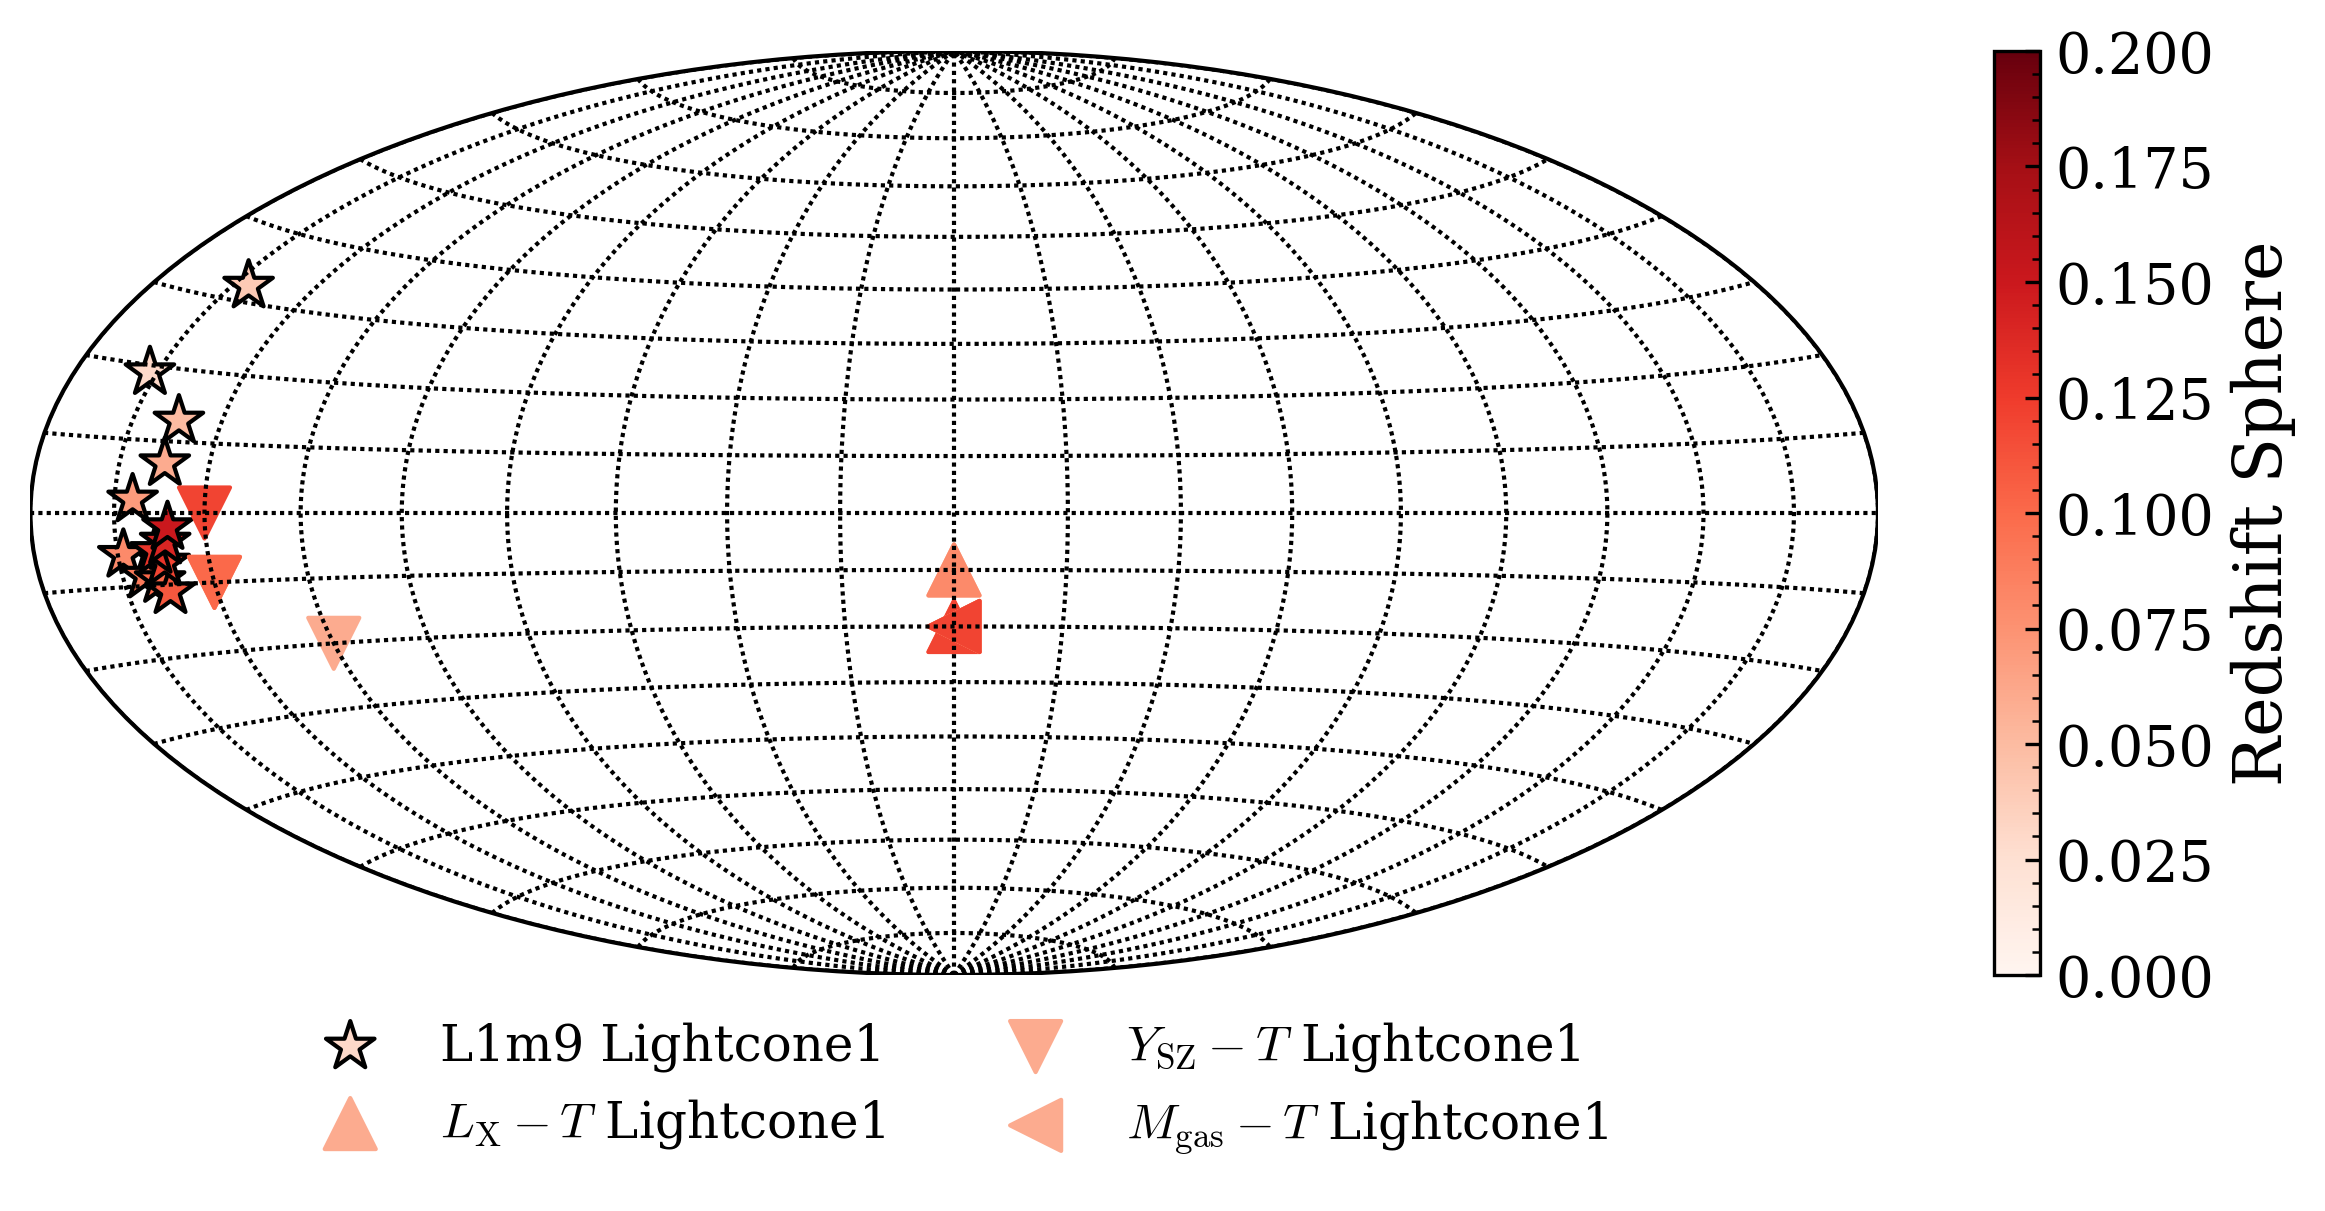

In [ ]:
import sys
sys.path.append('../tools/')
import clusterplot as cp
from adjustText import adjust_text

# Lightcone number
i = 1

# Use hammer projection
fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
m = Basemap(projection='hammer', lon_0=0)

# texts = [] # for adjusting texts

# Calculate and plot the bulk flow for the first lightcone
data = pd.read_csv(f'../data/samples_in_lightcone{i}_with_trees_duplicate_excision.csv')
zmaxs, ubfs, vlons, vlats = cf.true_bulk_flow_z(data) # ubf_z returns a list
m.scatter(vlons, vlats, marker='*', c=zmaxs, label=f'L1m9 Lightcone{i}', 
            latlon=True, cmap='Reds', vmin=0, vmax=0.2, 
            edgecolors='black', s=150)
# m.plot(vlons, vlats, latlon=True, zorder=-1, alpha=0.5)



# Plot the modeled bulk flow
markers = ['^','v','<']
j = 0 # marker index
df = pd.read_csv(f'../data/fits/bulk_flow_lightcone{i}.csv')
for relation, label in zip(['LX-T', 'YSZ-T', 'M-T'], ['$L_\\mathrm{{X}}-T$', '$Y_\\mathrm{{SZ}}-T$', '$M_\\mathrm{{gas}}-T$']):
    zmaxs = df['zmax'].loc[df['scaling_relation']==relation]
    vlons = df['lon'].loc[df['scaling_relation']==relation]
    vlats = df['lat'].loc[df['scaling_relation']==relation]
    zmaxs = np.array(zmaxs)
    vlons = np.array(vlons)
    vlats = np.array(vlats)
    vlons, vlats = cf.opposite_direction_arr(vlons, vlats)
    m.scatter(vlons, vlats, marker=markers[j], c=zmaxs, 
                label=f'{label} Lightcone{i}', latlon=True, cmap='Reds', 
                vmin=0, vmax=0.2, s=150)
    
    # for k, zmax in enumerate(zmaxs):
    #     x, y = m(vlons[k], vlats[k])
    #     # ax.annotate(f'z<{zmax}', (x, y), fontsize=8, color='black')
    #     texts.append(ax.annotate(f'z<{zmax}', (x, y-zmax-1), fontsize=8, color='black'))
    # m.plot(vlons, vlats, latlon=True, zorder=-1, alpha=0.5)

    # Add a marker index
    j += 1

# Adjust the texts
# adjust_text(texts, only_move='y-', ax=ax)

m.drawparallels(np.arange(-90,90,10.))
m.drawmeridians(np.arange(-180,180,20.))

# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
ax.legend(loc='lower center', shadow=True, ncol=2, bbox_to_anchor=(0.5, -0.25))
plt.colorbar(label='Redshift Sphere')
plt.show()

## MCMC results 

z<0.03, 29 haloes 182.70 km/s (119.77, 37.48)
z<0.04, 61 haloes 169.70 km/s (117.12, 54.32)
z<0.05, 88 haloes 100.65 km/s (126.98, 48.82)
z<0.06, 138 haloes 98.35 km/s (89.29, 48.44)
z<0.07, 161 haloes 94.94 km/s (84.13, 44.28)
z<0.08, 184 haloes 96.62 km/s (90.86, 50.10)
z<0.09, 214 haloes 100.80 km/s (82.78, 44.45)
z<0.10, 227 haloes 96.98 km/s (83.33, 44.97)
z<0.11, 248 haloes 98.47 km/s (73.46, 48.18)
z<0.12, 267 haloes 87.73 km/s (69.85, 42.42)
z<0.13, 282 haloes 77.84 km/s (65.00, 43.43)
z<0.14, 294 haloes 72.61 km/s (60.40, 41.67)
z<0.15, 300 haloes 67.54 km/s (61.46, 41.82)


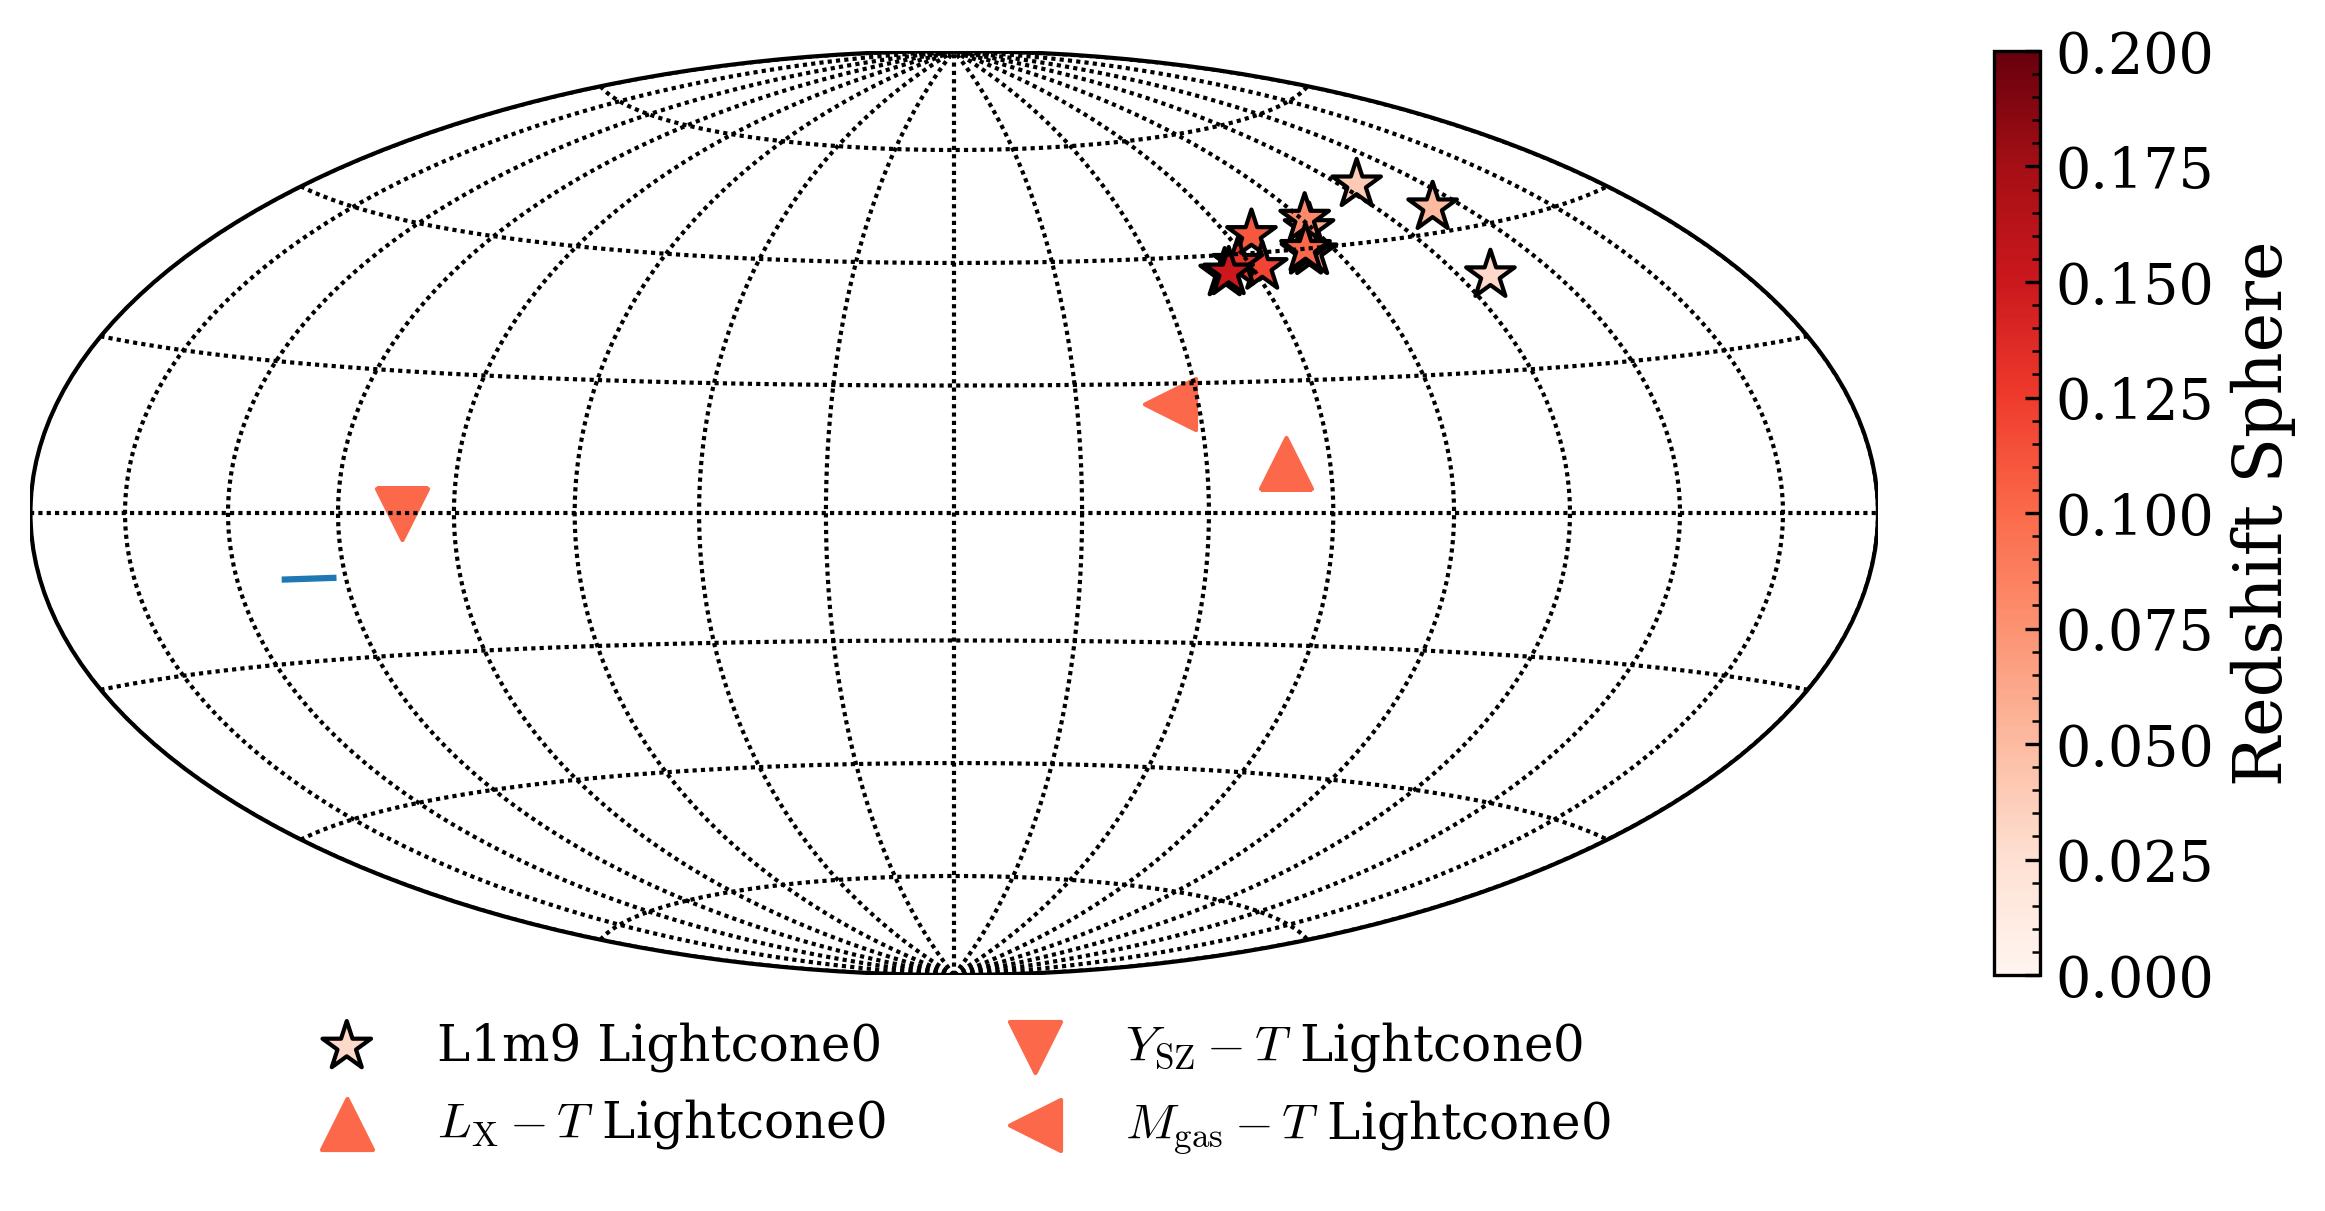

In [ ]:
import sys
sys.path.append('../tools/')
import clusterplot as cp

# Lightcone number
i = 0

# Use hammer projection
fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
m = Basemap(projection='hammer', lon_0=0)


# Calculate and plot the bulk flow for the first lightcone
data = pd.read_csv(f'../data/samples_in_lightcone{i}_with_trees_duplicate_excision.csv')
zmaxs, ubfs, vlons, vlats = cf.true_bulk_flow_z(data) # ubf_z returns a list
m.scatter(vlons, vlats, marker='*', c=zmaxs, label=f'L1m9 Lightcone{i}', 
            latlon=True, cmap='Reds', vmin=0, vmax=0.2, 
            edgecolors='black', s=150)


# Plot the modeled bulk flow
markers = ['^','v','<']

# LX-T
label = '$L_\\mathrm{{X}}-T$'
zmaxs = [0.1]
vlons = [-120.594]
vlats = [-8.434]
vlons, vlats = cf.opposite_direction_arr(vlons, vlats)
m.scatter(vlons, vlats, marker=markers[0], c=zmaxs, 
            label=f'{label} Lightcone{i}', latlon=True, cmap='Reds', 
            vmin=0, vmax=0.2, s=150)


# YSZ-T
label = '$Y_\\mathrm{{SZ}}-T$'
zmaxs = [0.1]
vlons = [80]
vlats = [0.2]
vlons, vlats = cf.opposite_direction_arr(vlons, vlats)
m.scatter(vlons, vlats, marker=markers[1], c=zmaxs, 
            label=f'{label} Lightcone{i}', latlon=True, cmap='Reds', 
            vmin=0, vmax=0.2, s=150)

# Mgas-T
label = '$M_\\mathrm{{gas}}-T$'
zmaxs = [0.1]
vlons = [-140.3]
vlats = [-18.9]
vlons, vlats = cf.opposite_direction_arr(vlons, vlats)
m.scatter(vlons, vlats, marker=markers[2], c=zmaxs, 
            label=f'{label} Lightcone{i}', latlon=True, cmap='Reds', 
            vmin=0, vmax=0.2, s=150)
    
m.drawparallels(np.arange(-90,90,22.5))
m.drawmeridians(np.arange(-180,180,22.5))

# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
ax.legend(loc='lower center', shadow=True, ncol=2, bbox_to_anchor=(0.5, -0.25))
plt.colorbar(label='Redshift Sphere')
plt.show()

z<0.03, 97 haloes 169.15 km/s (93.34, 50.29)
z<0.04, 172 haloes 157.24 km/s (100.59, 53.93)
z<0.05, 244 haloes 123.68 km/s (99.58, 50.24)
z<0.06, 344 haloes 107.90 km/s (87.62, 44.05)
z<0.07, 391 haloes 100.29 km/s (81.94, 39.14)
z<0.08, 447 haloes 98.06 km/s (85.39, 40.57)
z<0.09, 507 haloes 93.12 km/s (81.62, 37.39)
z<0.10, 544 haloes 90.11 km/s (82.15, 36.71)
z<0.11, 595 haloes 84.77 km/s (76.54, 37.76)
z<0.12, 626 haloes 80.44 km/s (73.60, 34.55)
z<0.13, 653 haloes 75.23 km/s (74.25, 34.01)
z<0.14, 673 haloes 70.64 km/s (70.98, 31.65)
z<0.15, 690 haloes 69.27 km/s (69.27, 31.98)


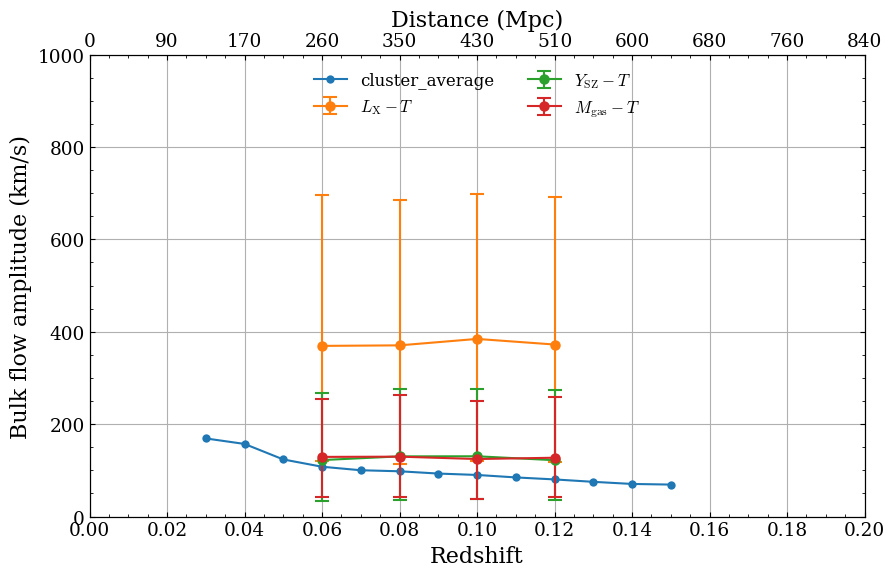

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('nice.mplstyle')
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
import tools.clusterfit as cf
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=68.1, Om0=0.306)
fig, ax = plt.subplots(figsize=(10, 6))

# Lightcone number
i = 0

# Calculate and plot the bulk flow for the first lightcone
data = pd.read_csv(f'../data/samples_in_lightcone{i}_with_trees_duplicate_excision.csv')
for method in ['cluster_average']:
    zmaxs, ubfs, vlons, vlats = cf.true_bulk_flow_z(data, method, n_clusters=len(data)) # ubf_z returns a list
    zmaxs = np.array(zmaxs)

    ax.plot(zmaxs, ubfs, marker='o', label=f'{method}')

# 
df = pd.read_csv(f'../data/fits/bulk_flow_mcmc_lightcone{i}.csv')
for relation, label in zip(['LX-T', 'YSZ-T', 'M-T'], ['$L_\\mathrm{{X}}-T$', '$Y_\\mathrm{{SZ}}-T$', '$M_\\mathrm{{gas}}-T$']):
    # Select the relation 
    mask = df['scaling_relation']==relation

    # Get the data
    zmaxs = df['zmax'].loc[mask] # Do LX-T for now
    ubfs  = df['ubf'].loc[mask]
    yerr1 = df['ubf_err_lower'].loc[mask]
    yerr2 = df['ubf_err_upper'].loc[mask]
    
    # Type change
    zmaxs = np.array(zmaxs)
    ubfs = np.array(ubfs)
    yerr1 = np.array(yerr1)
    yerr2 = np.array(yerr2)

    # Plot the data
    ax.errorbar(zmaxs, ubfs, yerr=[yerr1, yerr2], marker='o', label=f'{label}', capsize=5, elinewidth=1.5, markeredgewidth=1.5)

# Set up the plot
ax.set_xlabel('Redshift')
ax.set_ylabel('Bulk flow amplitude (km/s)')
ax.set_xticks(np.linspace(0, 0.2, 11))

# set a double x label for redshift
ax2 = ax.twiny()
ax2.set_xlim(0, 0.2)
ax2.set_xticks(np.linspace(0, 0.2, 11))                    # this line maps the x values to the new x axis

# Calculate comoving distance
Dco = cosmo.comoving_distance(np.linspace(0,0.2,11)).value # this line sets the tick labels for the new x axis
xtickslabels = np.round(Dco, -1)
xtickslabels = np.array(xtickslabels, dtype=int) 
ax2.set_xticklabels(xtickslabels) # this line sets the tick labels for the new x axis
ax2.set_xlabel('Distance (Mpc)')

ax.grid(True)
ax.set_xlim(0, 0.2)
ax.set_ylim(0, 1000)

# legend on the bottom ouside of the plot
ax.legend(loc='upper center', shadow=True, ncol=2)
plt.show()

z<0.03, 111 haloes 214.33 km/s (210.80, 22.04)
z<0.04, 148 haloes 196.88 km/s (211.04, 25.61)
z<0.05, 227 haloes 176.87 km/s (208.86, 14.57)
z<0.06, 305 haloes 156.10 km/s (205.55, 6.11)
z<0.07, 383 haloes 139.95 km/s (203.90, 0.16)
z<0.08, 458 haloes 123.48 km/s (195.97, -6.28)
z<0.09, 516 haloes 117.41 km/s (195.79, -9.59)
z<0.10, 567 haloes 107.97 km/s (199.21, -10.40)
z<0.11, 619 haloes 103.65 km/s (201.86, -11.14)
z<0.12, 646 haloes 100.74 km/s (202.78, -10.35)
z<0.13, 680 haloes 96.91 km/s (203.87, -8.67)
z<0.14, 700 haloes 96.96 km/s (204.85, -7.04)
z<0.15, 711 haloes 94.92 km/s (204.43, -5.57)


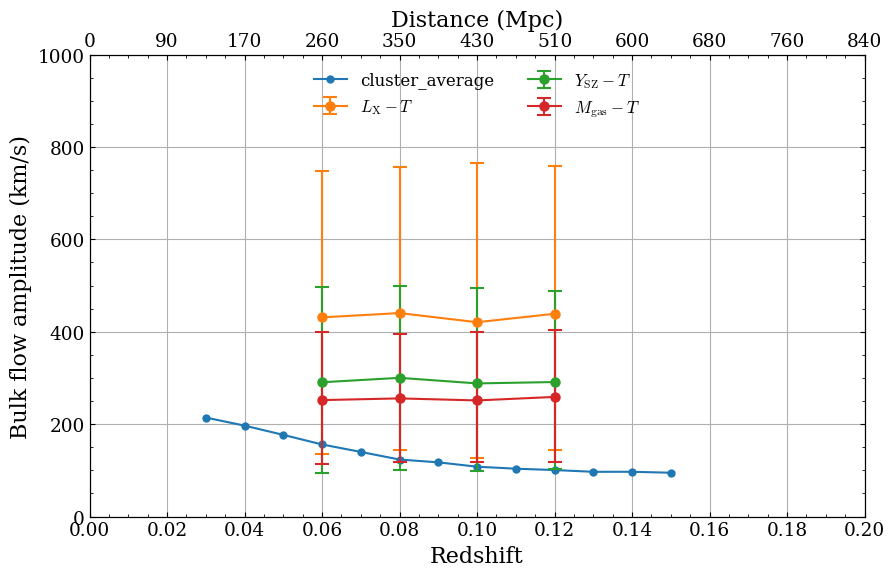

In [1]:
import matplotlib.pyplot as plt
plt.style.use('nice.mplstyle')
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
import tools.clusterfit as cf
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=68.1, Om0=0.306)
fig, ax = plt.subplots(figsize=(10, 6))

# Lightcone number
i = 1

# Calculate and plot the bulk flow for the first lightcone
data = pd.read_csv(f'../data/samples_in_lightcone{i}_with_trees_duplicate_excision.csv')
for method in ['cluster_average']:
    zmaxs, ubfs, vlons, vlats = cf.true_bulk_flow_z(data, method, n_clusters=len(data)) # ubf_z returns a list
    zmaxs = np.array(zmaxs)

    ax.plot(zmaxs, ubfs, marker='o', label=f'{method}')

# 
df = pd.read_csv(f'../data/fits/bulk_flow_mcmc_lightcone{i}.csv')
for relation, label in zip(['LX-T', 'YSZ-T', 'M-T'], ['$L_\\mathrm{{X}}-T$', '$Y_\\mathrm{{SZ}}-T$', '$M_\\mathrm{{gas}}-T$']):
    # Select the relation 
    mask = df['scaling_relation']==relation

    # Get the data
    zmaxs = df['zmax'].loc[mask] # Do LX-T for now
    ubfs  = df['ubf'].loc[mask]
    yerr1 = df['ubf_err_lower'].loc[mask]
    yerr2 = df['ubf_err_upper'].loc[mask]
    
    # Type change
    zmaxs = np.array(zmaxs)
    ubfs = np.array(ubfs)
    yerr1 = np.array(yerr1)
    yerr2 = np.array(yerr2)

    # Plot the data
    ax.errorbar(zmaxs, ubfs, yerr=[yerr1, yerr2], marker='o', label=f'{label}', capsize=5, elinewidth=1.5, markeredgewidth=1.5)

# Set up the plot
ax.set_xlabel('Redshift')
ax.set_ylabel('Bulk flow amplitude (km/s)')
ax.set_xticks(np.linspace(0, 0.2, 11))

# set a double x label for redshift
ax2 = ax.twiny()
ax2.set_xlim(0, 0.2)
ax2.set_xticks(np.linspace(0, 0.2, 11))                    # this line maps the x values to the new x axis

# Calculate comoving distance
Dco = cosmo.comoving_distance(np.linspace(0,0.2,11)).value # this line sets the tick labels for the new x axis
xtickslabels = np.round(Dco, -1)
xtickslabels = np.array(xtickslabels, dtype=int) 
ax2.set_xticklabels(xtickslabels) # this line sets the tick labels for the new x axis
ax2.set_xlabel('Distance (Mpc)')

ax.grid(True)
ax.set_xlim(0, 0.2)
ax.set_ylim(0, 1000)

# legend on the bottom ouside of the plot
ax.legend(loc='upper center', shadow=True, ncol=2)
plt.show()